# Excercise 2: Multilayer Perceptron
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_DL_CODE/blob/main/dl03_mlp_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

"""
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
"""
- Get mnist data set.
- Prepare test, valid, train sets
- create KNeighborsClassifier, fit it and score using sklearn
- define tensorflow model with 1 hidden layer, fit it and score

# Get data


In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

/Users/marcinsawinski/miniforge3/envs/tf310m/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# SGDClassifier

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [3]:
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=1/7)

In [4]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train[:10000], y_train[:10000]) 


SVC()

In [5]:
cross_val_score(svm_clf, X_train[:2000], y_train[:2000], cv=3, scoring="accuracy")

array([0.92503748, 0.90554723, 0.92792793])

# KNeighborsClassifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9715

In [7]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.974

# Keras

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import os, datetime
#reshape data into tensor [batch, width, height,channels] only to flatten it next
X, y = mnist.data, mnist.target
X = X.reshape(70000,28,28,1)
#normalize data
X = X / 255
y = y.astype(np.uint8)
#split data into train, validation and test
X_train_full, X_test, y_train_full, y_test  = train_test_split(X, y, test_size=1/7)
X_train, X_valid, y_train, y_valid  = train_test_split(X_train_full, y_train_full, test_size=1/6)

In [9]:
# Load the TensorBoard notebook extension


## MLP

In [10]:
# Check labels shape
y_train.shape

(50000,)

In [11]:
# Check images shape
X_train.shape

(50000, 28, 28, 1)

In [12]:
# Define the model (list of layers) - method 1
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-21 09:31:42.180379: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-21 09:31:42.180659: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
# Define the model (add layers) - method 2
model = tf.keras.Sequential(name="sequential_model_1")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28], name="input_layer"))
model.add(tf.keras.layers.Dense(300, activation="relu", name="hidden_layer_1"))
model.add(tf.keras.layers.Dense(100, activation="relu", name="hidden_layer_2"))
model.add(tf.keras.layers.Dense(10, activation="softmax", name="output_layer"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

In [14]:
# Display the model summary
model.summary()

Model: "sequential_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


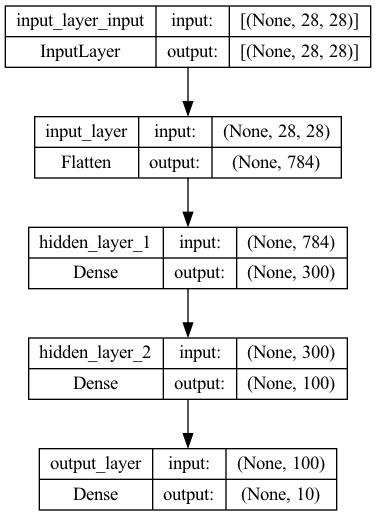

In [15]:
# Print model layers
tf.keras.utils.plot_model(model, show_shapes=True)

In [18]:
# Define tensorboard callback
logdir = os.path.join("logs", "mnist",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size = 32, validation_data=(X_valid, y_valid), callbacks=[tensorboard_callback])

Epoch 1/10


2023-03-21 09:34:31.922866: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-21 09:34:32.501030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2117 - accuracy: 0.9368

2023-03-21 09:34:54.612397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 24s 14ms/step - loss: 0.2117 - accuracy: 0.9368 - val_loss: 0.1584 - val_accuracy: 0.9502
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0859 - accuracy: 0.9730 - val_loss: 0.0963 - val_accuracy: 0.9713
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.0580 - accuracy: 0.9812 - val_loss: 0.0944 - val_accuracy: 0.9739
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.0424 - accuracy: 0.9861 - val_loss: 0.0938 - val_accuracy: 0.9733
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0357 - accuracy: 0.9881 - val_loss: 0.0911 - val_accuracy: 0.9757
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.0257 - accuracy: 0.9913 - val_loss: 0.1009 - val_accuracy: 0.9749
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.0251 - accuracy: 0.9917 - val_loss: 0.0960 - val_accura

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1370 - accuracy: 0.9714


[0.13702629506587982, 0.9714000225067139]

In [20]:
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


# Compare models

In [21]:
from tensorflow.keras import  layers, models, initializers

In [22]:
model1 = tf.keras.Sequential(name="sequential_model_1")
model1.add(layers.Flatten(input_shape=[28, 28], name="input_layer"))
model1.add(layers.Dense(300, activation="sigmoid", kernel_initializer = "RandomNormal", name="hidden_layer_1"))
model1.add(layers.Dense(300, activation="sigmoid", kernel_initializer = "RandomNormal", name="hidden_layer_2"))
model1.add(layers.Dense(300, activation="sigmoid", kernel_initializer = "RandomNormal", name="hidden_layer_3"))
model1.add(layers.Dense(300, activation="sigmoid", kernel_initializer = "RandomNormal", name="hidden_layer_4"))
model1.add(layers.Dense(10,  activation="softmax", name="output_layer"))

model1.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

In [23]:
# Define tensorboard callback
logdir = os.path.join("logs", "sigmoid_random_sgd")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
# Train the model
model1.fit(X_train, y_train, epochs=10, batch_size = 512, 
            validation_data=(X_valid, y_valid), 
            callbacks=[tensorboard_callback])

Epoch 1/10


2023-03-21 09:38:02.471906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - ETA: 0s - loss: 2.3199 - accuracy: 0.1082

2023-03-21 09:38:04.337962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - 2s 17ms/step - loss: 2.3199 - accuracy: 0.1082 - val_loss: 2.3001 - val_accuracy: 0.1190
Epoch 2/10
98/98 [==============================] - 1s 11ms/step - loss: 2.3013 - accuracy: 0.1126 - val_loss: 2.2998 - val_accuracy: 0.1190
Epoch 3/10
98/98 [==============================] - 1s 10ms/step - loss: 2.3013 - accuracy: 0.1114 - val_loss: 2.2996 - val_accuracy: 0.1190
Epoch 4/10
98/98 [==============================] - 1s 10ms/step - loss: 2.3013 - accuracy: 0.1120 - val_loss: 2.2999 - val_accuracy: 0.1190
Epoch 5/10
98/98 [==============================] - 1s 10ms/step - loss: 2.3012 - accuracy: 0.1116 - val_loss: 2.2994 - val_accuracy: 0.1190
Epoch 6/10
98/98 [==============================] - 1s 10ms/step - loss: 2.3012 - accuracy: 0.1111 - val_loss: 2.2993 - val_accuracy: 0.1190
Epoch 7/10
98/98 [==============================] - 1s 10ms/step - loss: 2.3012 - accuracy: 0.1121 - val_loss: 2.2992 - val_accuracy: 0.1190
Epoch 8/10
98/98 [======

In [26]:
model2 = tf.keras.Sequential(name="sequential_model_2")
model2.add(layers.Flatten(input_shape=[28, 28], name="input_layer"))
model2.add(layers.Dropout(0.2, name="dropout_layer1"))
model2.add(layers.Dense(300, activation="relu", kernel_initializer = "GlorotNormal", name="hidden_layer_1"))
model2.add(layers.Dropout(0.2, name="dropout_layer2"))
model2.add(layers.Dense(300, activation="relu", kernel_initializer = "GlorotNormal", name="hidden_layer_2"))
model2.add(layers.Dropout(0.2, name="dropout_layer3"))
model2.add(layers.Dense(300, activation="relu", kernel_initializer = "GlorotNormal",name="hidden_layer_3"))
model2.add(layers.Dropout(0.2, name="dropout_layer4"))
model2.add(layers.Dense(300, activation="relu", kernel_initializer = "GlorotNormal",name="hidden_layer_4"))
model2.add(layers.Dropout(0.2, name="dropout_layer5"))
model2.add(layers.Dense(10,  activation="softmax", name="output_layer"))

model2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

In [27]:
# Define tensorboard callback
logdir = os.path.join("logs", "relu_glorot_nadam")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
# Train the model
model2.fit(X_train, y_train, epochs=10, batch_size = 32, validation_data=(X_valid, y_valid), callbacks=[tensorboard_callback])

Epoch 1/10


2023-03-21 09:40:09.917919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.3093 - accuracy: 0.9044

2023-03-21 09:40:37.871881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 30s 18ms/step - loss: 0.3093 - accuracy: 0.9044 - val_loss: 0.1591 - val_accuracy: 0.9557
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.1523 - accuracy: 0.9544 - val_loss: 0.1143 - val_accuracy: 0.9680
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.1213 - accuracy: 0.9644 - val_loss: 0.1032 - val_accuracy: 0.9697
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.1040 - accuracy: 0.9696 - val_loss: 0.0948 - val_accuracy: 0.9748
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0930 - accuracy: 0.9731 - val_loss: 0.0898 - val_accuracy: 0.9744
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0845 - accuracy: 0.9744 - val_loss: 0.0833 - val_accuracy: 0.9765
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0771 - accuracy: 0.9770 - val_loss: 0.0906 - val_accura

In [ ]:
# Compare models
from tensorflow.keras import  layers, models, initializers

model2 = tf.keras.Sequential(name="sequential_model_1")
model2.add(layers.Flatten(input_shape=[28, 28], name="input_layer"))
model2.add(layers.Dense(300, activation="relu", kernel_initializer = "GlorotNormal", name="hidden_layer_1"))
model2.add(layers.Dense(300, activation="relu", kernel_initializer = "GlorotNormal", name="hidden_layer_2"))
model2.add(layers.Dense(300, activation="relu", kernel_initializer = "GlorotNormal",name="hidden_layer_3"))
model2.add(layers.Dense(300, activation="relu", kernel_initializer = "GlorotNormal",name="hidden_layer_4"))
model2.add(layers.Dense(10,  activation="softmax", name="output_layer"))

model2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

In [ ]:
model1.save("model1.h5")
model2.save("model2.h5")

In [ ]:
model1 = tf.keras.models.load_model("model1.h5")
model2 = tf.keras.models.load_model("model2.h5")

In [ ]:
%tensorboard --logdir logs/mnist

## CNN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

In [ ]:
model.summary()

In [ ]:
model.evaluate(X_test, y_test)